<a href="https://colab.research.google.com/github/TuskiNinjaa/image-recuperation/blob/main/TM1_Recupera%C3%A7%C3%A3o_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TM1 - Recuperação de Imagens

The main objective of this project is to develop an algorithm based on KNN, using histograms of images, that can be able to compare images in a dataset and return the k most similar images to the input image.

----

O principal objetivo deste projeto é desenvolver um algoritmo baseado em KNN, usando histogramas de imagens, que seja capaz de comparar imagens em um conjunto de dados e retornar as k imagens mais semelhantes à imagem de entrada.

----

Author:

* Vitor Yuske Watanabe - 2020.1905.058-4
* Matheus Lopo Borges - 2017.1904.081-8

## Imports

In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm.notebook import tqdm

## Downloading dataset

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1eEonH58rL7iJd283Gg3L8Ytcqs6_OU0K/view?usp=drive_link

Downloading...
From: https://drive.google.com/uc?id=1eEonH58rL7iJd283Gg3L8Ytcqs6_OU0K
To: /content/Vistex.zip
100% 32.1M/32.1M [00:01<00:00, 22.5MB/s]


In [ ]:
# https://drive.google.com/file/d/1eEonH58rL7iJd283Gg3L8Ytcqs6_OU0K/view?usp=drive_link
with zipfile.ZipFile("./Vistex.zip", 'r') as zip_ref:
    zip_ref.extractall("")

## Functions

In [ ]:
# Function used to generate the image's histogram
def count_color_frequency(image):
    if len(image.shape) > 2:
        channels = image.shape[2]
        frequency = np.zeros((256, channels))

        for channel in range(channels):
            count = np.unique(image[:,:,channel], return_counts=True)
            frequency[count[0],channel] = count[1]

    else:
        frequency = np.zeros((256,))
        count = np.unique(image, return_counts=True)
        frequency[count[0]] = count[1]

    return frequency

In [ ]:
def ccf_laco(image):
    channels = image.shape[2]
    frequency = np.zeros((256, channels))

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(channels):
                frequency[image[i,j,k], k] += 1

    return frequency

In [ ]:
# Plots the image and its histogram
def plot_image_and_frequency(image, frequency, mode, image_name=""):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(8,2))

    ax1.set_title(image_name)

    if mode=="HSV":
        image = Image.fromarray(image, mode).convert("RGB")
        image = np.asarray(image)
        ax1.imshow(image)
        colors = ["Orange", "Brown", "Gray"]
        for channel in range(frequency.shape[1]):
            ax2.plot(frequency[:,channel], color=colors[channel])

    elif mode=="RGB":
        ax1.imshow(image)
        colors = ["Red", "Green", "Blue"]
        for channel in range(frequency.shape[1]):
            ax2.plot(frequency[:,channel], color=colors[channel])

    elif mode=="L":
        ax1.imshow(image, cmap="gray")
        ax2.plot(frequency)

    plt.show()

In [ ]:
# Function used to compare two histograms
def mse(array1, array2):
    return np.sum(np.power(array1-array2, 2))

In [ ]:
# Function used to calculate the distance betweet the input image and all the images on the dataset
def calculate_distances(input_name, dataset_folder, error_function, mode, print_instances):
    image = Image.open(os.path.join(dataset_folder, input_name)).convert(mode)
    image = np.asarray(image)
    pixel_number = image.shape[0]*image.shape[1]
    input_frequency = count_color_frequency(image)/pixel_number

    if print_instances == True:
        plot_image_and_frequency(image, input_frequency, mode, input_name)

    distances = []
    for file_name in os.listdir(dataset_folder):
        image = Image.open(os.path.join(dataset_folder, file_name)).convert(mode)
        image = np.asarray(image)
        file_frequency = count_color_frequency(image)/pixel_number
        distances.append([file_name, error_function(input_frequency, file_frequency)])

        if print_instances == True:
            plot_image_and_frequency(image, file_frequency, mode, file_name)

    return distances

In [ ]:
# Function that uses the k closest images to the input to determinate the class of the input image
def knn(input_name, dataset_folder, k=3, error_function=mse, mode="RGB", print_nearest_neighbor=False, print_instances=False):
    distances = calculate_distances(input_name=input_name, dataset_folder=dataset_folder, error_function=mse, mode=mode, print_instances=print_instances)
    distances.sort(key=lambda x: x[1])

    if print_nearest_neighbor==True:
        for i in range(k):
            file_name = distances[i][0]
            image = Image.open(os.path.join(dataset_folder, file_name)).convert(mode)
            image = np.asarray(image)
            pixel_number = image.shape[0]*image.shape[1]
            file_frequency = count_color_frequency(image)/pixel_number

            plot_image_and_frequency(image, file_frequency, mode, file_name)

    distances = distances[:k]
    classes = np.array(distances)[:,0]
    classes = np.char.ljust(classes, 4)
    count = np.unique(classes, return_counts=True)
    index = count[1].argmax()
    class_predicted = count[0][index]
    probability = count[1][index]/count[1].sum()

    return class_predicted, probability

In [ ]:
# Terminar
def evaluate_knn(dataset_folder, k, mode="RGB", print_nearest_neighbor=False, print_instances=False):
    answer = []
    for file_name in tqdm(os.listdir(dataset_folder)):
        class_labeled = file_name[0:4]
        class_predicted, probability = knn(input_name=file_name, dataset_folder=dataset_folder, k=k, mode=mode, print_nearest_neighbor=print_nearest_neighbor, print_instances=print_instances)

        answer.append(True if class_labeled == class_predicted else False)
        #print(class_labeled, class_predicted, probability, True if class_labeled == class_predicted else False)

    return answer

## Applying inference

In [ ]:
dataset_folder = "./Vistex"
input_name = "c002_015.png"
k = 3
mode = "RGB"
print("%d images"% len(os.listdir(dataset_folder)))

864 images


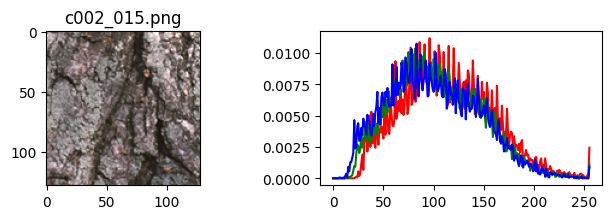

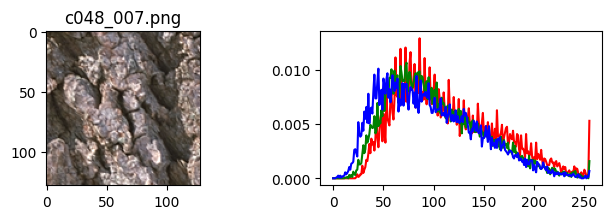

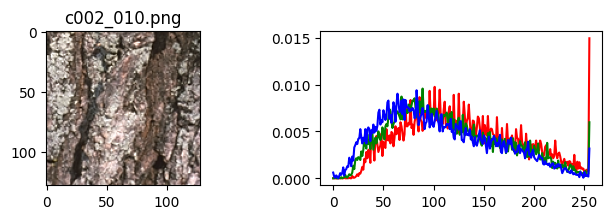

In [ ]:
class_predicted, probability = knn(input_name=input_name, dataset_folder=dataset_folder, k=k, mode=mode, print_nearest_neighbor=True, print_instances=False)

In [ ]:
print("Class predicted: %s"% class_predicted)
print("Probability of classification: %f"% probability)

Class predicted: c002
Probability of classification: 0.666667


## Test

In [ ]:
answer = evaluate_knn(dataset_folder=dataset_folder, k=7, mode="L", print_nearest_neighbor=False)

  0%|          | 0/864 [00:00<?, ?it/s]

In [ ]:
a = np.unique(answer, return_counts=True)
print(a)
a = a[1][1]/(a[1][0]+a[1][1])
print(a)

(array([False,  True]), array([124, 740]))
0.8564814814814815


## Results



The developed algorithm was capable of performing classifications and indicating the probability level of the assigned class by utilizing the k closest elements of the input image.

For the algorithm's evaluation, tests were conducted using the entire dataset to assess the classifier's accuracy while altering the k value and the image reading mode: RGB, HSV, or Gray (L). Images are presented at the end of the text.

Considering the dataset contained its own input image, it is reasonable to anticipate that the algorithm's performance is being overestimated, as the closest image to the input is the input image itself, resulting in a zero distance. Furthermore, an observation was made that increasing the value of k led to a decrease in accuracy across all three reading modes.

Moreover, it was noticeable that the classifier algorithm was capable of assessing image similarity based on color content presented in the images through the histogram. However, it was unable to analyze the textures and morphological features present in the image, as this information is lost when solely employing the histogram for sorting.

----
O algoritmo desenvolvido foi capaz de realizar classificações e informar o grau de probabilidade da classe determinada, utilizando os k elementos mais próximos da imagem de entrada.

Para a avaliação do algoritmo foram realizados testes com todo o conjunto de dados, a fim de verificar a acurácia do classificador ao modificar o valor de k e o modo de leitura da imagem: RGB, HSV ou Cinza (L). Imagens apresentadas ao final do texto.

Como o conjunto de dados possuía a própria imagem de entrada, é de se esperar que o desempenho do algoritmo está sendo superestimado, pois a imagem mais próxima da entrada é ela mesma, apresentando distância zero. Ademais, foi possível observar que ao aumentar o valor de k a acurácia reduziu nos três modos de leitura.

Além disso, foi possível observar que o algoritmo classificador conseguia verificar a similaridade das imagens pelo conteúdo de cores presente nas imagens devido ao histograma, mas não era capaz de analisar os relevos, características morfológicas presentes na imagem, pois essas informações são perdidas ao usar somente o histograma na classificação.

### RGB

k | accuracy |
--- | --- |
3 | 0.9907407407407407 |
5 | 0.9722222222222222 |
7 | 0.9502314814814815 |
9 | 0.9120370370370371 |

### HSV

k | accuracy |
--- | --- |
3 | 0.9849537037037037 |
5 | 0.9629629629629629 |
7 | 0.9629629629629629 |
9 | 0.9479166666666666 |

### L (Gray)

Used formula L = R * 299/1000 + G * 587/1000 + B * 114/1000

k | accuracy |
--- | --- |
3 | 0.9178240740740741 |
5 | 0.875 |
7 | 0.8564814814814815 |
9 | 0.8240740740740741 |